In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [14]:
class KNNClassifier:
    def __init__(self, k=3, distance_func=None):
        self.k = k
        if distance_func is None:
            self.distance_func = self.euclidean_distance
        else:
            self.distance_func = distance_func


    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(x1 - x2) ** 2)

    def manhattan_distance(x1, x2):
        return np.sum(np.abs(x1 - x2))
    
    def predict(self, X):
        predictions = []
        for index, x in enumerate(X):
            distances = [self.distance_func(x.flatten(), x_train.flatten()) for x_train in self.X_train]

            k_indices = np.argsort(distances)[:self.k]
            k_neighbor_labels = self.y_train[k_indices]

            counts = np.bincount(k_neighbor_labels.astype(int))
            predicted_label = np.argmax(counts)
            predictions.append(predicted_label)

        return np.array(predictions)

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

train_size = int(0.8 * len(X))
X_train, X_test = X[ :train_size], X[train_size: ]
y_train, y_test = y[ :train_size], y[train_size: ]

X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]

X_train = np.array(X_train)
X = np.array(X)

In [16]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [ ]:
def plot_decision_boundaries(classifier, X, y, means, title='Decision Boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    colors = plt.get_cmap('tab10', np.unique(y).size + 1)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=colors)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, edgecolor='k', s=40)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label=f'Class {i}',
                   markerfacecolor=colors(i), markersize=10) for i in range(np.unique(y).size)
    ], loc='upper right')
    plt.show()

In [18]:
distance_func = euclidean_distance

k = 5
knn = KNNClassifier(k=k, distance_func=distance_func)
knn.fit(X_train_2D, y_train)

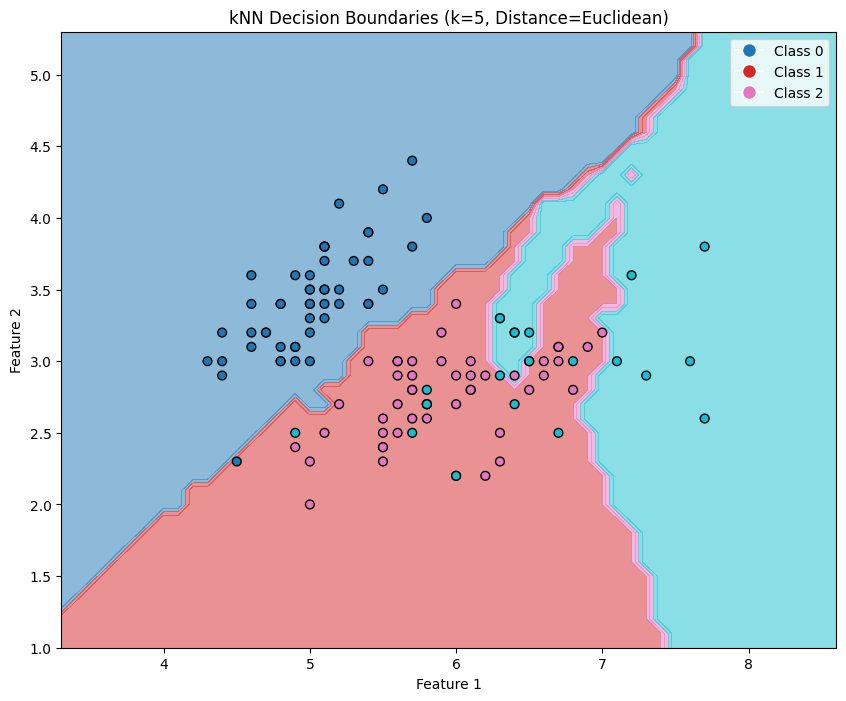

In [19]:
plot_decision_boundaries(
    classifier=knn,
    X=X_train_2D,
    y=y_train,
    means=None,
    title=f'kNN Decision Boundaries (k={k}, Distance=Euclidean)'
)